In [1]:
import numpy 
import peakutils
from peakutils.plot import plot as pplot
from matplotlib import pyplot
%matplotlib inline

In [39]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

#one gaussian
def gaussian(nm, a, x0, sigma):
    """
    gaussian function
    """
    gaussian_array = a * np.exp(- ((nm - x0) ** 2.0) / (2 * (sigma ** 2.0))) 
    
    return gaussian_array


x = np.arange(850, 1600, 1)
y= gaussian(x, 1, 950, 30)
np.random.seed(1729)
y_noise = 0.2 * np.random.normal(size=x.size)
ydata = y + y_noise






In [11]:
popt

array([1.        , 1.        , 0.08563569])

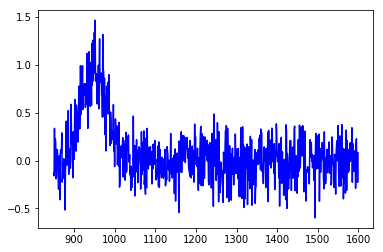

In [17]:
 plt.plot(x, ydata, 'b-', label='data')

In [41]:
initial = [np.max(y), x[0], (x[1] - x[0]) * 5]
initial

[1.0, 850, 5]

In [36]:
from scipy import optimize
popt, pcov = curve_fit(gaussian, x, ydata, initial)
popt

array([-5.18532915e-01,  8.77929492e+02, -5.89490481e-01])

In [42]:
from scipy import optimize
popt, pcov = optimize.curve_fit(gaussian, x, y, initial)
popt

array([  1., 950.,  30.])

In [38]:

popt, pcov = curve_fit(gaussian, x, ydata)

/Users/tutu/miniconda3/lib/python3.6/site-packages/scipy/optimize/minpack.py:785: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


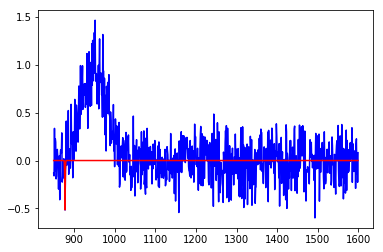

In [37]:
plt.plot(x, ydata, 'b-', label='data')
plt.plot(x, gaussian(x, *popt), 'r-', label='fit: a=%5.3f, b=%5.3f, c=%5.3f' % tuple(popt))

Text(0.5,1,'Data with noise')

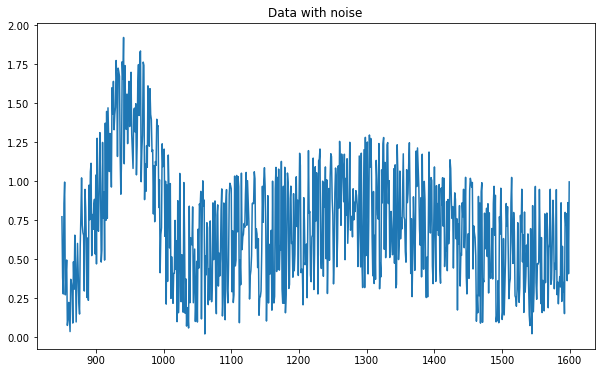

In [11]:
centers = (950, 1300)
x = numpy.arange(850, 1600, 1)
y = (peakutils.gaussian(x, 1, centers[0], 30) +
        peakutils.gaussian(x, 0.3, centers[1], 100) +
        numpy.random.rand(x.size))
pyplot.figure(figsize=(10,6))
pyplot.plot(x, y)
pyplot.title("Data with noise")

[  4  56  91 127 174 208 248 284 324 364 410 454 513 573 606 664]
[ 854  906  941  977 1024 1058 1098 1134 1174 1214 1260 1304 1363 1423
 1456 1514] [0.99337492 1.31063183 1.92041205 1.61016747 1.04897788 1.00139793
 0.9858984  1.0593058  1.12601302 1.19518806 1.25445147 1.29516176
 1.24546524 1.13653409 0.99084678 1.02335102]


Text(0.5,1,'First estimate')

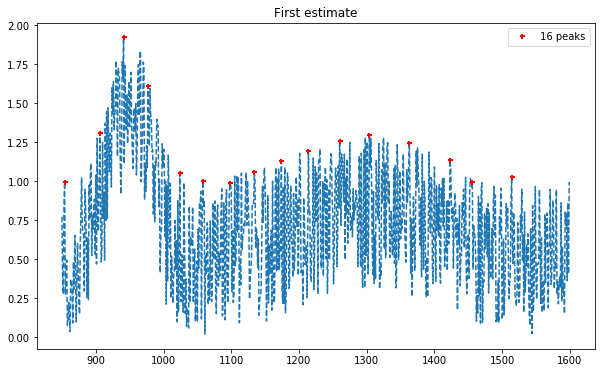

In [12]:
indexes = peakutils.indexes(y, thres=0.5, min_dist=30)
print(indexes)
print(x[indexes], y[indexes])
pyplot.figure(figsize=(10,6))
pplot(x, y, indexes)
pyplot.title('First estimate')

In [5]:
peaks_x = peakutils.interpolate(x, y, ind=indexes)
print(peaks_x)

[4875.0928417   914.92869193  944.18609074  983.54258657 1060.84467399
 1108.06124124 1155.83904002  339.         1235.99370906  431.
 1314.18958111 1361.46061364  549.         1426.6030494  1502.58271872]


/Users/tutu/miniconda3/lib/python3.6/site-packages/peakutils/peak.py:221: UserWarning: Optimal parameters not found: Number of calls to function has reached maxfev = 800.
  warnings.warn(str(e))


Text(0.5,1,'Data with baseline')

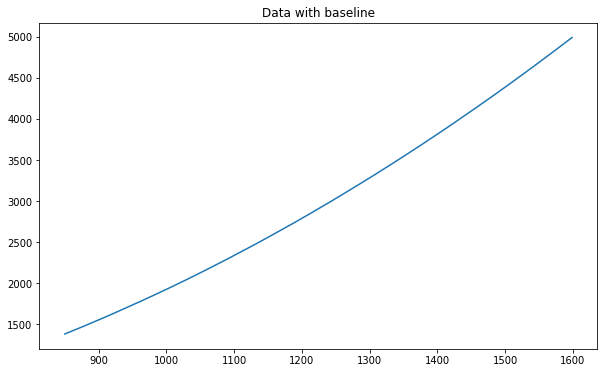

In [6]:
y2 = y + numpy.polyval([0.002,-0.08,5], x)
pyplot.figure(figsize=(10,6))
pyplot.plot(x, y2)
pyplot.title("Data with baseline")

Text(0.5,1,'Data with baseline removed')

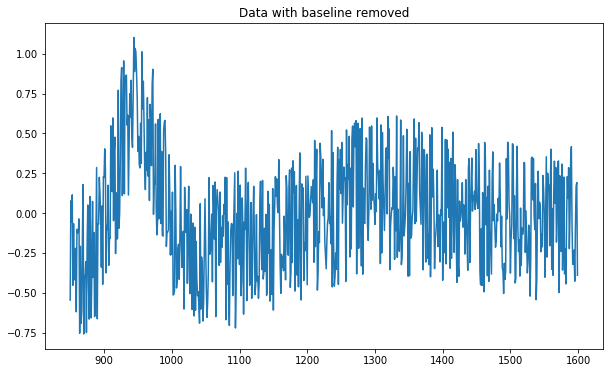

In [7]:
base = peakutils.baseline(y2, 2)
pyplot.figure(figsize=(10,6))
pyplot.plot(x, y2-base)
pyplot.title("Data with baseline removed")